# Analysis of repeated injections of the same sample

In [1]:
import os
import glycoproteomics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
from pprint import pprint
matplotlib_inline.backend_inline.set_matplotlib_formats("png")
figure_size = (8, 4)
dpi = 100

spectra_directory = "/Users/jonesm5/Dropbox (The Francis Crick)/Serum_RepInj"

Read in all spectra from folder:

In [2]:
spectra = glycoproteomics.io.read_spectra_directory(spectra_directory)
pprint(list(spectra.keys()))

['20210616_serum_repinj_2.5ug_10.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_4.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_9.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_3.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_7.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_6.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_1.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_2.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_8.wiff.dia.extracted.txt',
 '20210616_serum_repinj_2.5ug_5.wiff.dia.extracted.txt']


Bin the spectra to make them easier to work with and merge

In [3]:
rt_x_bin_size = 0.06
mz_y_bin_size = 2.0

binned_spectra = {
    name: glycoproteomics.spectrum.bin(
        spectrum,
        rt_x_bin_size,
        mz_y_bin_size,
        np.mean)
    for name, spectrum in spectra.items()
}
del(spectra)

Merge the spectra and plot the resulting merged spectrum.

In [4]:

merged_spectrum = glycoproteomics.spectrum.combine(binned_spectra, np.sum)
ions = glycoproteomics.spectrum.list_ions(merged_spectrum)
print(ions)

['366.14']


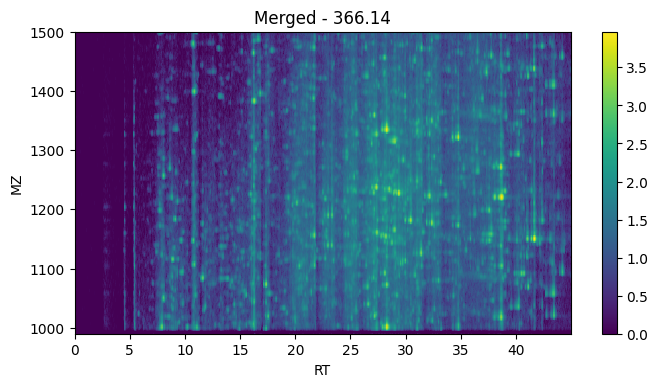

In [5]:
ion = ions[0]
merged_ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(merged_spectrum, ion)
glycoproteomics.plotting.plot_ion_matrix(
    merged_ion_matrix,
    x_label,
    y_label,
    "Merged - " + ion,
    figure_size,
    dpi
)
plt.show()

Calling the top 100 peaks from this file

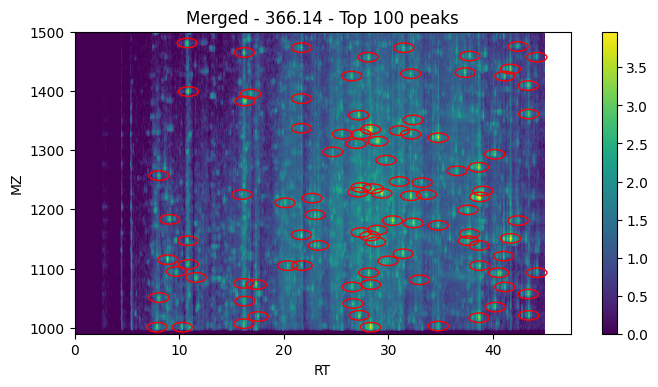

In [6]:
top_N_peaks = 100
x_radius = rt_x_bin_size * 16.0
y_radius = mz_y_bin_size * 4.0

peaks = glycoproteomics.peaks.find(
    merged_ion_matrix,
    x_label,
    y_label,
    top_N_peaks,
    x_radius,
    y_radius
)

glycoproteomics.plotting.plot_ion_matrix_with_peaks(
    merged_ion_matrix,
    x_label,
    y_label,
    peaks,
    x_radius,
    y_radius,
    "Merged - " + ion + " - Top {} peaks".format(top_N_peaks),
    figure_size,
    dpi
)
plt.show()

For each spectra, return the summed values for each peak and plot the spectra.

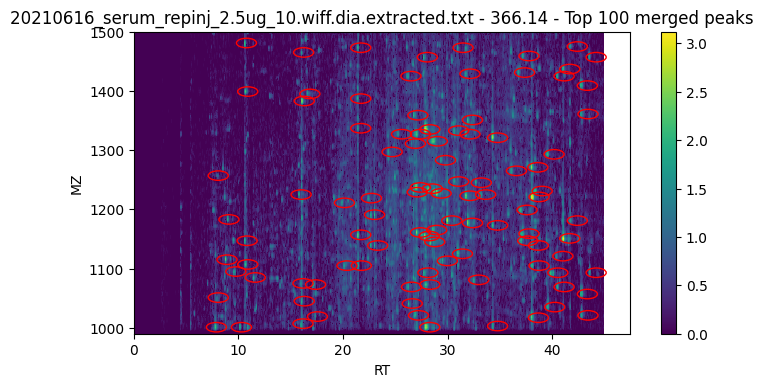

[1317.08, 1212.68, 985.852, 645.89525, 571.8115]


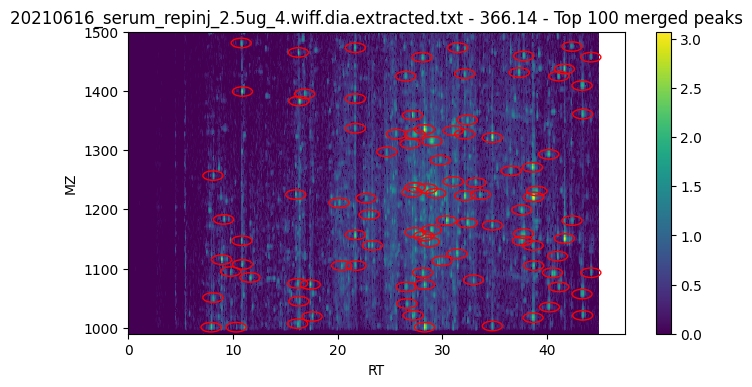

[1155.65, 1186.25, 976.27475, 722.3905, 486.7745]


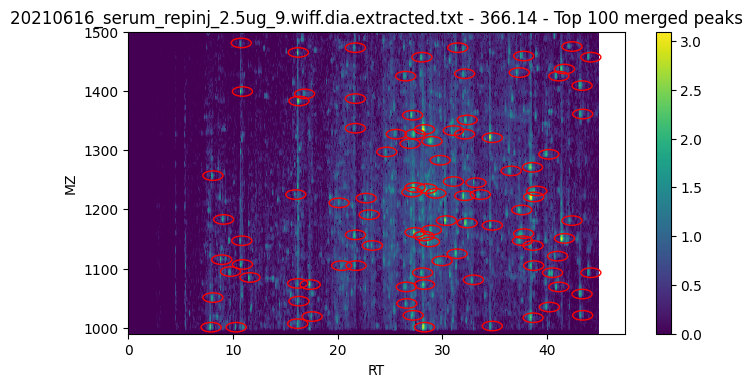

[1243.115, 1130.9450000000002, 1035.2350000000001, 693.338, 611.5419999999999]


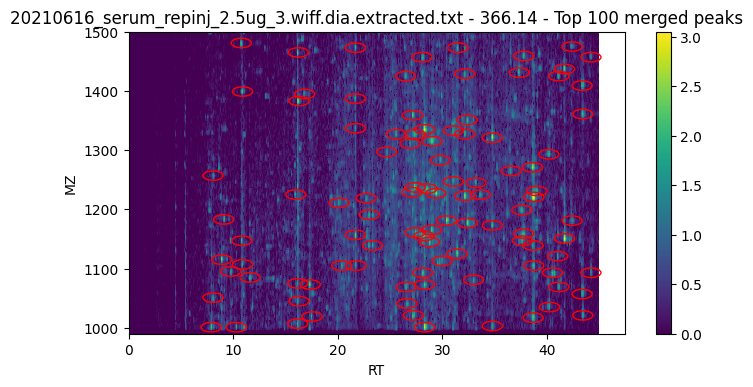

[1118.995, 1081.505, 909.25225, 681.371, 525.7075]


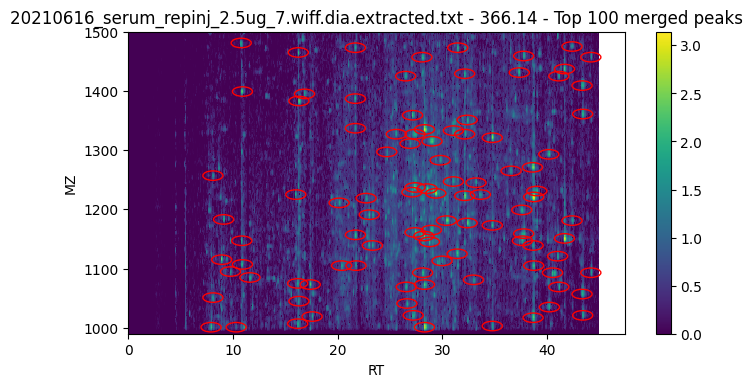

[1385.06, 1074.04, 942.06, 701.9304999999999, 462.72025]


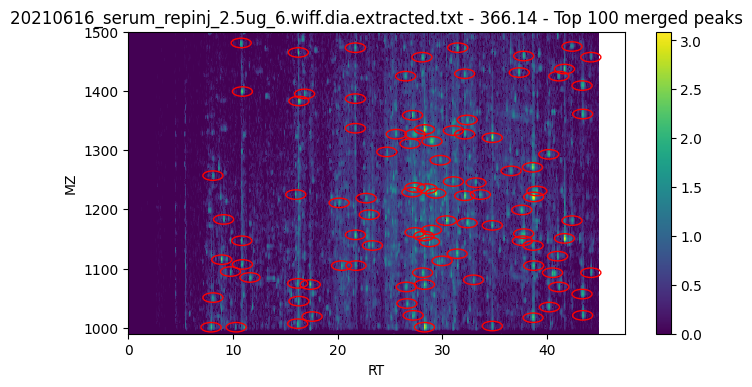

[1227.51, 1094.49, 956.93575, 719.267, 524.3065]


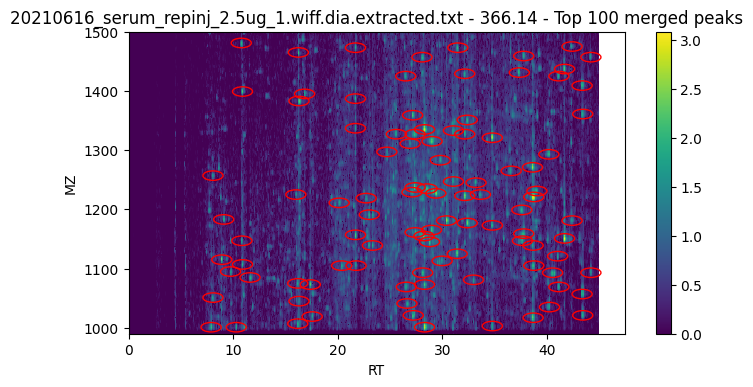

[1216.885, 1125.29, 845.2675, 681.425, 573.8975]


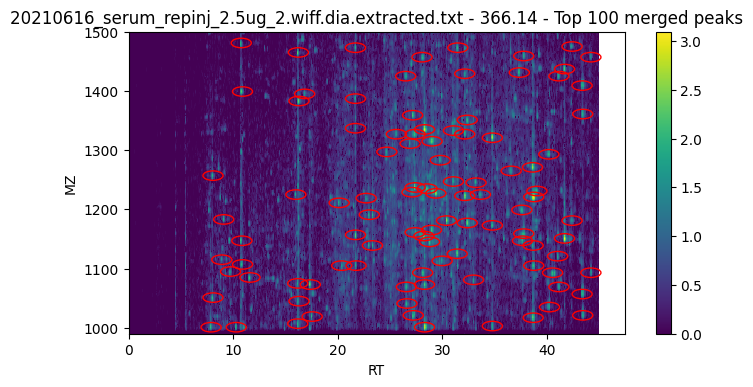

[1242.3600000000001, 1142.685, 932.7835, 674.083, 580.1610000000001]


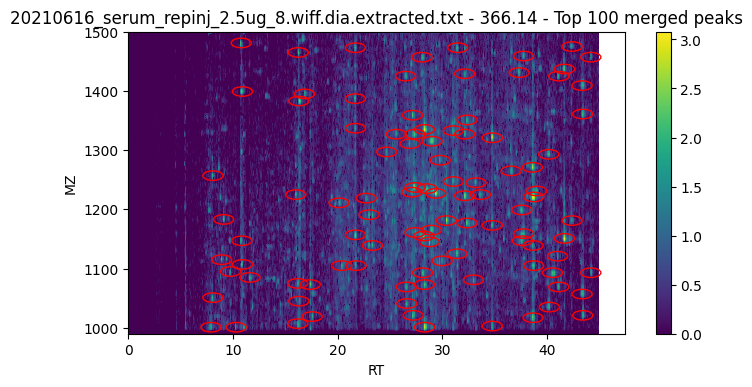

[1066.4850000000001, 1196.28, 937.7407499999999, 654.444, 552.8025]


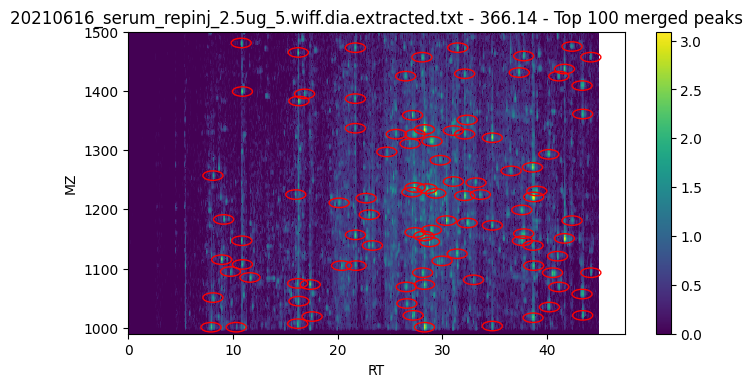

[1232.3000000000002, 1158.63, 969.7117499999999, 726.4485, 559.735]


In [7]:
peak_value_dict = {}
for name, spectrum in binned_spectra.items():
    ion_matrix, x_label, y_label = glycoproteomics.spectrum.to_matrix(spectrum, ion)
    # Plot the individual spectrum with the merged peaks
    glycoproteomics.plotting.plot_ion_matrix_with_peaks(
        ion_matrix,
        x_label,
        y_label,
        peaks,
        x_radius,
        y_radius,
        "{} - ".format(name) + ion + " - Top {} merged peaks".format(top_N_peaks),
        figure_size,
        dpi
    )
    plt.show()
    # Determine the maximum value within the peak ellipse for each peak
    peak_values = glycoproteomics.peaks.integrate(
        ion_matrix, x_label, y_label, peaks, x_radius, y_radius, np.max
    )
    peak_value_dict[name] = peak_values
    # Print the top 5 peaks
    print(peak_values[:5])


Save the maximum peak values to a separate file.

In [8]:
with open("repeat_injection_peaks.tsv", "w") as out_f:
    out_f.write("\t".join(["spectrum_name"] +
        ["peak_{}".format(i+1) for i in range(top_N_peaks)]) + "\n")
    for name, peak_values in peak_value_dict.items():
        out_f.write("\t".join([name] + ["{}".format(i) for i in peak_values]) + "\n")